In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pickle, os
import matplotlib as mpl
from scipy.io import wavfile
from scipy import signal

In [4]:
music_n = 'dynamite'
Dir = 'G:/2021/KIST/1.code/Python/original data/music_sheet/music/music_label/'+music_n+'/'
label_list = os.listdir(Dir)

In [5]:
label_list

['dynamite_label_2.txt',
 'dynamite_label_3.txt',
 'dynamite_label_4.txt',
 'dynamite_label_5.txt',
 'dynamite_label_6.txt',
 'dynamite_label_7.txt',
 'dynamite_label_12.txt',
 'dynamite_label_13.txt',
 'dynamite_label_14.txt',
 'dynamite_label_15.txt',
 'dynamite_label_16.txt',
 'dynamite_label_17.txt',
 'dynamite_label_18.txt',
 'dynamite_label_19.txt']

In [6]:
#순서 입력 (배열 인덱스)
with open(Dir + label_list[3], 'rb') as f:
    data = pickle.load(f)  

In [7]:
#템포입력
tempo = 114
stem_time = 60/tempo*4
staff_time = stem_time*4  # 현재 마디의 개수
pre_time = stem_time*16    # 이전 마디의 개수
#pre_time = stem_time*(((((())))))

# 160 tempo의 1/8음표를 기준
scale_time_range = 60/160/2

In [8]:
title = data[0]
b = data[1]
num_staff = data[2]
labels = data[3]

if b == '4/4':
    staff_beats = 4

beats_ratio = []
notes = []

for beat, note in labels:
    if beat == '1':
        beats_ratio.append(1/staff_beats)
    elif beat == '1/2':
        beats_ratio.append(1/2/staff_beats)
    elif beat == '1/4':
        beats_ratio.append(1/4/staff_beats)
    elif beat == '1/8':
        beats_ratio.append(1/8/staff_beats)
    elif beat == '1/16':
        beats_ratio.append(1/16/staff_beats)
    elif beat == '1/32':
        beats_ratio.append(1/32/staff_beats)   
    elif beat == '3/8':
        beats_ratio.append(3/8/staff_beats)  
    elif beat == '3/16':
        beats_ratio.append(3/16/staff_beats)
    notes.append(note)

In [12]:
#노래선택
#music,sr = librosa.load("G:/2021/KIST/1.code/Python/original data/music_sheet/music/music/앞뒤crop/dynamite.wav")
pre_sample = round(pre_time * sr)
staff_sample = round(pre_time * sr + staff_time * sr)
music_crop = music[pre_sample:staff_sample]

['1/8' list(['Bass', 'Crash'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Snare', 'Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Snare', 'Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Snare', 'Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Snare', 'Bass', 'Closed_Hihat'])]
['1/8' list(['Opened_Hihat'])]
['1/8' list(['Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Snare', 'Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Snare', 'Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Bass', 'Closed_Hihat'])]
['1/8' list(['Closed_Hihat'])]
['1/8' list(['Snare', 'Bass', 'Closed_Hihat

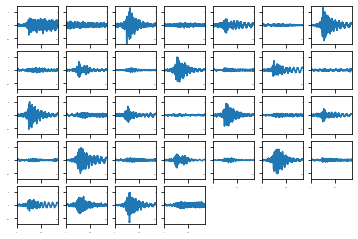

In [13]:
#beat별로 crop
music_crops_per_beat = []
flag = 0

for i, ratio in enumerate(beats_ratio):
    crop_range = len(music_crop)*ratio
    music_crops_per_beat.append(music_crop[round(flag):round(flag+crop_range)])
    flag += crop_range

#1/16 제거
cnt = 0
for i, [beat, note] in enumerate(labels):
    if beat == '1/16':
        del music_crops_per_beat[i-cnt]
        cnt += 1
        
# scaling to tempo 160 - 1/8
for i in range(len(music_crops_per_beat)):
    music_crops_per_beat[i] = music_crops_per_beat[i][0:round(scale_time_range*sr)]
data_8 = []
for i, label in enumerate(labels):
    if label[0] == '1/16':
        continue
    else:
        data_8.append(labels[i])
        print(labels[i])
    
for i in range(len(music_crops_per_beat)):
    plt.subplot(5,len(music_crops_per_beat)//5+1,i+1)
    plt.plot(music_crops_per_beat[i])
    plt.xlim(0, round(scale_time_range*sr))
    plt.ylim(-0.7, 0.7)
    plt.xticks(fontsize=0.1)
    plt.yticks(fontsize=0.1)

(-0.7, 0.7)

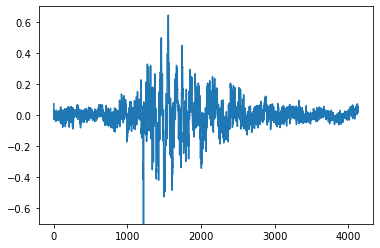

In [24]:
sample = music_crops_per_beat[2]
plt.plot(sample)
plt.ylim(-0.7,0.7)

0.0


(0.0, 1.0)

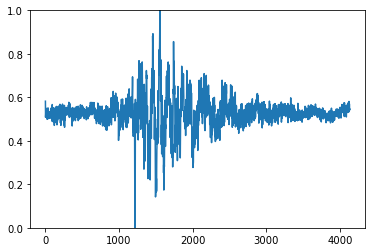

In [28]:
import numpy as np
sample_1 = (sample-min(sample))/(max(sample)-min(sample))
plt.plot(sample_1)
print(min(sample_1))
plt.ylim(0,1)

In [16]:
S = librosa.feature.melspectrogram(sample,sr,n_fft=512)

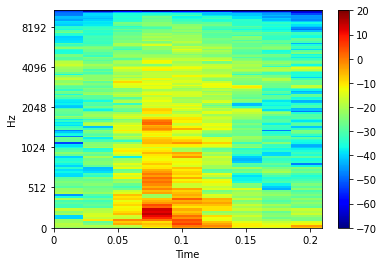

In [19]:
S_dB = librosa.power_to_db(S)
img = librosa.display.specshow(S_dB, cmap='jet', x_axis='time', y_axis='mel', sr=sr)
plt.colorbar()
plt.clim(-70,20)

In [197]:
stft_sample = np.abs(librosa.stft(sample))

cqt_sample = np.abs(librosa.cqt(sample))

C:\Users\ADmin\anaconda3\envs\new_torch\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=256 is too small for input signal of length=130
  n_fft, y.shape[-1]
C:\Users\ADmin\anaconda3\envs\new_torch\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=256 is too small for input signal of length=65
  n_fft, y.shape[-1]


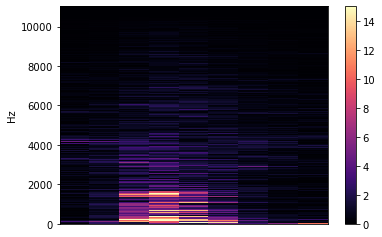

In [198]:
librosa.display.specshow(stft_sample, y_axis='linear')
plt.colorbar()
plt.clim(0,15)

C:\Users\ADmin\anaconda3\envs\new_torch\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


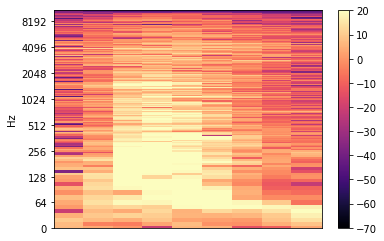

In [199]:
librosa.display.specshow(librosa.amplitude_to_db(stft_sample), cmap='magma', y_axis='log')
plt.colorbar()
plt.clim(-70,20)

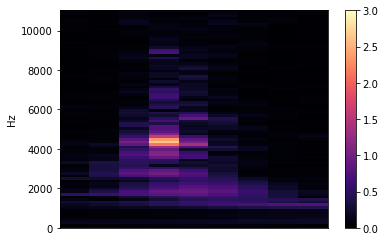

In [200]:
librosa.display.specshow(cqt_sample, y_axis='linear')
plt.colorbar()
plt.clim(0,3)

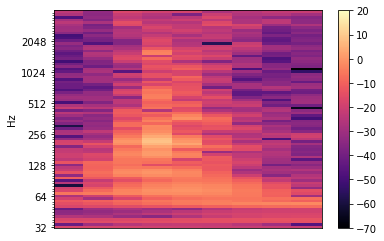

In [205]:
librosa.display.specshow(librosa.amplitude_to_db(cqt_sample), cmap='magma', y_axis='cqt_hz')
plt.colorbar()
plt.clim(-70,20)